
# Notebook with snippets for data cleaning and basic EDA

**References**

https://github.com/ChawlaAvi/Daily-Dose-of-Data-Science/tree/main/Pandas  

# Basic Libraries

In [6]:
#%load_ext cudf.pandas # speed up pandas
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Settings

In [8]:
# number formatting
pd.options.display.float_format = '{:,.2f}'.format
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# max rows and columns to show
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# Importing Data

In [9]:
# from Github
df = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com//gsrubio/portfolio/main/datasets/supermarket_sales.csv', # replace github.com for raw.githubusercontent.com/ and remove the 'blob'
    sep=',',
    decimal='.',
    parse_dates=[10], # date column
    )

## Personalize data importing

In [10]:
# import a few rows to check the dataset structure
#df = pd.read_csv('data.csv', nrows=100)

# import only the selected columns
#pd.read_csv("data.csv", usecols=["date", "price"])

# change data types
#pd.read_csv("data.csv", dtype={"house_type": "category"})

# parse dates
#df = pd.read_csv('data.csv', parse_dates=[0]) # or parse_dates={'date': ['year', 'month', 'day']}; optional: dayfirst=True

# set date column as index
#pd.read_csv("data.csv", index_col="date")

# reading multiple files
#import glob
#import os
#files = glob.glob("file_*.csv")
#result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Data validation and cleaning

In [11]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [13]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [14]:
df.nunique()

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Total,990


In [15]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,"1,000.00","1,000.00","1,000.00","1,000.00",1000,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,55.67,5.51,15.38,322.97,2019-02-14 00:05:45.600000,307.59,4.76,15.38,6.97
min,10.08,1.00,0.51,10.68,2019-01-01 00:00:00,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,2019-01-24 00:00:00,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,2019-02-13 00:00:00,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,2019-03-08 00:00:00,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,"1,042.65",2019-03-30 00:00:00,993.00,4.76,49.65,10.00
std,26.49,2.92,11.71,245.89,NaN,234.18,0.00,11.71,1.72


In [16]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

## Duplicated values

In [17]:
df.duplicated().sum()

0

In [18]:
df['Invoice ID'].duplicated().sum()

0

## Null values

In [19]:
# returns observations with null values
df.loc[df.isnull().any(axis=1)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [20]:
# total null values per column
df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [21]:
# % of null values per collumn
df.isna().mean()

,0
Invoice ID,0.00
Branch,0.00
City,0.00
Customer type,0.00
Gender,0.00
Product line,0.00
Unit price,0.00
Quantity,0.00
Tax 5%,0.00
Total,0.00


<Axes: >

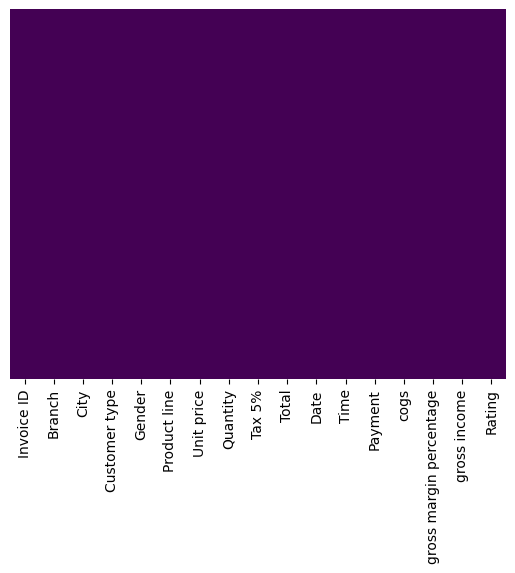

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Remove null values

In [23]:
# remove records with no invoice id
df.dropna(subset=['Invoice ID'], inplace=True)

### Replace null values

## Date Transformations

In [25]:
# convert to date time
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# truncate dates
df = (df
      .assign(
          year = df['Date'].dt.year
          ,month = df['Date'].dt.month
          ,week = df['Date'].dt.isocalendar().week
          ,month_year = df['Date']
                        .dt.to_period('M') # truncate month-year
                        .dt.to_timestamp()
          ,week_year = df['Date']
                .dt.to_period('W') # truncate week-year
                .dt.to_timestamp()
      )
)

## Creating new categories

In [27]:
df = (df
      .assign(
          macro_category = np.select(
                 [
                  df['Product line'].isin(['Health and beauty', 'Electronic accessories', 'Home and lifestyle']),
                  df['Product line'].str.contains('Home'),
                  df['Product line'].isin(['Sports and travel', 'Food and beverages', 'Fashion accessories']),
                  df['Product line'].notnull() == True
                 ],
                 ['Category 1', 'Category 1', 'Category 2', 'Other']
          )
          ,price_category = np.where(df['Total'] > 500, 'Expensive', 'Not Expensive')
      )
)

In [28]:
# create conditions based on gross income
conditions = [
    (df['gross income'] < 10),
    (df['gross income'] >= 10) & (df['gross income'] < 20),
    (df['gross income'] >= 20)
]
categories = ['<10','10-20', '>20']

# create categories
df['gross income category'] = np.select(conditions, categories)

# cast to categorical type and order based on categories array
df['gross income category'] = pd.Categorical(df['gross income category'], categories=categories, ordered=True)

In [29]:
# Calculate median
q50 = df['cogs'].quantile(0.50)

# Create new column based on median
df['cogs category'] = np.where(df['cogs'] < q50, 'low cogs', 'high cogs')

In [30]:
# Calculate quartiles
q25 = df['cogs'].quantile(0.25)
q50 = df['cogs'].quantile(0.50)
q75 = df['cogs'].quantile(0.75)

# Create new column based on quartiles
df['cogs quartile'] = np.where(df['cogs'] < q25, 'q25',
                                np.where(df['cogs'] < q50, 'q50',
                                        np.where(df['cogs'] < q75, 'q75', 'q100')))

# cast to categorical and define order
category_order = ['q25','q50','q75','q100']
df['cogs quartile'] = pd.Categorical(df['cogs quartile'], categories=category_order, ordered=True)

In [31]:
def create_bins(df, column, bin_edges):
    labels = [f'({bin_edges[i]}-{bin_edges[i+1]}]' for i in range(len(bin_edges)-1)]
    df[column + '_bins'] = pd.cut(df[column], bins=bin_edges, labels=labels, include_lowest=True)
    df[column + '_bins'] = pd.Categorical(df[column + '_bins'], categories=labels, ordered=True)

## Replacing values

In [32]:
# replace one value for another
df['Customer type'] = df['Customer type'].replace('Normal', 'Non-Member')

# replace values using regex
df['Payment'] = df['Payment'].replace(to_replace=r'.*card.*', value='Card', regex=True)

## Renaming columns

In [33]:
df = (df
      .rename(columns ={
          'Date':'payment_date'
          ,'Invoice ID':'invoice_id'
      })
)

In [34]:
df_pre = df.rename(columns=lambda x: x.replace('pre_', ''))

##Drop columns

In [40]:
df_drop = df.drop(columns=['month', 'week'])

## Combining Tables (JOIN)

In [41]:
df_left = df.query("Gender == 'Female'").groupby(by=['City']).agg(female_gross_income=('gross income','sum'))
df_right = df.query("Gender == 'Male'").groupby(by=['City']).agg(male_gross_income=('gross income','sum'))


df_merged = df_left.merge(df_right, how='left', on=['City']).reset_index()
df_merged

,City,female_gross_income,male_gross_income
0,Mandalay,"2,520.39","2,536.64"
1,Naypyitaw,"2,937.40","2,327.77"
2,Yangon,"2,536.63","2,520.53"


In [42]:
# on index
df_concat = pd.concat([df_left, df_right], axis=1)

## Combining Tables (UNION)

In [43]:
df_left = df.query("Gender == 'Female'").groupby(by=['City']).agg(female_gross_income=('gross income','sum')).reset_index()
df_right = df.query("Gender == 'Male'").groupby(by=['City']).agg(male_gross_income=('gross income','sum')).reset_index()

df_concat = pd.concat([df_left, df_right], ignore_index=True)
df_concat

,City,female_gross_income,male_gross_income
0,Mandalay,"2,520.39",NaN
1,Naypyitaw,"2,937.40",NaN
2,Yangon,"2,536.63",NaN
3,Mandalay,NaN,"2,536.64"
4,Naypyitaw,NaN,"2,327.77"
5,Yangon,NaN,"2,520.53"


# Filtering

In [44]:
df_filtered = df.query("macro_category == 'Category 1' and City != 'Yangon' and Quantity in (5,6,7)")
df_filtered.head()

,invoice_id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,payment_date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,month_year,week_year,macro_category,price_category,gross income category,cogs category,cogs quartile
1,226-31-3081,C,Naypyitaw,Non-Member,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,2019,3,10,2019-03-01,2019-03-04,Category 1,Not Expensive,<10,low cogs,q25
5,699-14-3026,C,Naypyitaw,Non-Member,Male,Electronic accessories,85.39,7,29.89,627.62,2019-03-25,18:30,Ewallet,597.73,4.76,29.89,4.10,2019,3,13,2019-03-01,2019-03-25,Category 1,Expensive,>20,high cogs,q100
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.51,451.71,2019-02-25,11:24,Ewallet,430.20,4.76,21.51,4.80,2019,2,9,2019-02-01,2019-02-25,Category 1,Not Expensive,>20,high cogs,q75
48,669-54-1719,B,Mandalay,Member,Male,Electronic accessories,18.93,6,5.68,119.26,2019-02-10,12:45,Card,113.58,4.76,5.68,8.10,2019,2,6,2019-02-01,2019-02-04,Category 1,Not Expensive,<10,low cogs,q25
59,120-06-4233,C,Naypyitaw,Non-Member,Male,Electronic accessories,30.61,6,9.18,192.84,2019-03-12,20:36,Cash,183.66,4.76,9.18,9.30,2019,3,11,2019-03-01,2019-03-11,Category 1,Not Expensive,<10,low cogs,q50


In [45]:
qtd = 5

df_filtered = df.query("Quantity == @qtd+1")
df_filtered.head()

,invoice_id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,payment_date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,week,month_year,week_year,macro_category,price_category,gross income category,cogs category,cogs quartile
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.65,433.69,2019-02-25,14:36,Ewallet,413.04,4.76,20.65,5.80,2019,2,9,2019-02-01,2019-02-25,Category 1,Not Expensive,>20,high cogs,q75
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.12,590.44,2019-01-15,16:19,Cash,562.32,4.76,28.12,4.50,2019,1,3,2019-01-01,2019-01-14,Category 2,Expensive,>20,high cogs,q100
17,765-26-6951,A,Yangon,Non-Member,Male,Sports and travel,72.61,6,21.78,457.44,2019-01-01,10:39,Card,435.66,4.76,21.78,6.90,2019,1,1,2019-01-01,2018-12-31,Category 2,Not Expensive,>20,high cogs,q75
42,354-25-5821,B,Mandalay,Member,Female,Sports and travel,69.12,6,20.74,435.46,2019-02-08,13:03,Cash,414.72,4.76,20.74,5.60,2019,2,6,2019-02-01,2019-02-04,Category 2,Not Expensive,>20,high cogs,q75
48,669-54-1719,B,Mandalay,Member,Male,Electronic accessories,18.93,6,5.68,119.26,2019-02-10,12:45,Card,113.58,4.76,5.68,8.10,2019,2,6,2019-02-01,2019-02-04,Category 1,Not Expensive,<10,low cogs,q25


# Encoding

In [49]:
# one hot enconding
df = pd.concat([df, pd.get_dummies(df.Gender, prefix='Gender')], axis=1)

# Grouping Data

## Percentage of Total

In [51]:
# % of total for binary feature
df.City.value_counts()/ df.shape[0]

,count
City,
Yangon,0.34
Mandalay,0.33
Naypyitaw,0.33


In [52]:
# total orders (to calculate % per segment)
total_orders = df['invoice_id'].nunique()

# Group the data and calculate metrics
df_grouped = (df
          .groupby('Product line', as_index=False, dropna=False)
          .agg(
              orders=('invoice_id', pd.Series.nunique),
              revenue=('Total', 'sum')
          )
          .sort_values(by='revenue', ascending=False)
          .assign(
              **{
                '% total orders': lambda x: x['orders'] / total_orders,
                '% revenue': lambda x: x['revenue'] / x['revenue'].sum()
                }
          )
)

# Add a row at the bottom with totals
totals_row = {
    'Product line': 'TOTAL',
    'orders': df['invoice_id'].nunique(),
    'revenue': df['Total'].sum(),
    '% total orders': df_grouped['% total orders'].sum(),
    '% revenue': df_grouped['% revenue'].sum()
}

# add total row to the dataframe
totals_row_df = pd.DataFrame(totals_row, index=[0])
df_grouped = pd.concat([df_grouped, totals_row_df], ignore_index=True)

# format for better reading
df_grouped = df_grouped.style.format(
              {
                'revenue': 'R${:,.0f}'.format,
                '% total orders': '{:,.0%}'.format,
                '% revenue': '{:,.0%}'.format
              },
              decimal=',',
              thousands='.',
              precision=2
            )

df_grouped

,Product line,orders,revenue,% total orders,% revenue
0,Food and beverages,174,R$56.145,17%,17%
1,Sports and travel,166,R$55.123,17%,17%
2,Electronic accessories,170,R$54.338,17%,17%
3,Fashion accessories,178,R$54.306,18%,17%
4,Home and lifestyle,160,R$53.862,16%,17%
5,Health and beauty,152,R$49.194,15%,15%
6,TOTAL,1.000,R$322.967,100%,100%


## Cummulative sum

In [53]:
# Group the data and calculate metrics
df_grouped = (df
          .groupby('Product line', as_index=False, dropna=False)
          .agg(
              revenue=('Total', 'sum')
          )
          .sort_values(by='revenue', ascending=False)
          .assign(
              **{
                '% revenue': lambda x: x['revenue'] / x['revenue'].sum(),
                'cummulative % revenue': lambda x: x['revenue'].cumsum() / x['revenue'].sum()
                }
          )
)

# format for better reading
df_grouped = df_grouped.style.format(
              {
                'revenue': 'R${:,.0f}'.format,
                '% revenue': '{:,.0%}'.format,
                'cummulative % revenue': '{:,.0%}'.format
              },
              decimal=',',
              thousands='.',
              precision=2
            )

df_grouped

,Product line,revenue,% revenue,cummulative % revenue
2,Food and beverages,R$56.145,17%,17%
5,Sports and travel,R$55.123,17%,34%
0,Electronic accessories,R$54.338,17%,51%
1,Fashion accessories,R$54.306,17%,68%
4,Home and lifestyle,R$53.862,17%,85%
3,Health and beauty,R$49.194,15%,100%


## Multiple Tables

In [54]:
cities = df.City.unique()

for city in cities:
  # filter city to print table
  df_city = df.query("City == @city")

  # Group the data and calculate metrics
  df_grouped = (df_city
            .groupby('Product line', as_index=False, dropna=False)
            .agg(
                revenue=('Total', 'sum')
            )
            .sort_values(by='revenue', ascending=False)
            .assign(
                **{
                  '% revenue': lambda x: x['revenue'] / x['revenue'].sum(),
                  'cummulative % revenue': lambda x: x['revenue'].cumsum() / x['revenue'].sum()
                  }
            )
  )

  # format for better reading
  df_grouped = df_grouped.style.format(
                {
                  'revenue': 'R${:,.0f}'.format,
                  '% revenue': '{:,.0%}'.format,
                  'cummulative % revenue': '{:,.0%}'.format
                },
                decimal=',',
                thousands='.',
                precision=2
              )

  print(f'Table for {city}')
  display(df_grouped)
  print()

Table for Yangon


,Product line,revenue,% revenue,cummulative % revenue
4,Home and lifestyle,R$22.417,21%,21%
5,Sports and travel,R$19.373,18%,39%
0,Electronic accessories,R$18.317,17%,57%
2,Food and beverages,R$17.163,16%,73%
1,Fashion accessories,R$16.333,15%,88%
3,Health and beauty,R$12.598,12%,100%



Table for Naypyitaw


,Product line,revenue,% revenue,cummulative % revenue
2,Food and beverages,R$23.767,21%,21%
1,Fashion accessories,R$21.560,19%,41%
0,Electronic accessories,R$18.969,17%,58%
3,Health and beauty,R$16.615,15%,73%
5,Sports and travel,R$15.762,14%,87%
4,Home and lifestyle,R$13.896,13%,100%



Table for Mandalay


,Product line,revenue,% revenue,cummulative % revenue
5,Sports and travel,R$19.988,19%,19%
3,Health and beauty,R$19.981,19%,38%
4,Home and lifestyle,R$17.549,17%,54%
0,Electronic accessories,R$17.051,16%,70%
1,Fashion accessories,R$16.413,15%,86%
2,Food and beverages,R$15.215,14%,100%


## Avg Target metric per group

In [55]:
# CVR (target_col) per group (c in feature_col)
for c in feature_col:
    if c in num_feat_col:
        continue
    print(renewal_df.loc[:, [c] + [target_col]].groupby([c]).mean())

NameError: name 'feature_col' is not defined

## Matrix with 2 groups and one metric

In [56]:
# create bins for revenue
bin_edges = [0, 100, 500, 1000, 10000]
df['revenue_bins'] = pd.cut(df['Total'], bins=bin_edges, include_lowest=True)


# Create a new DataFrame with the groups and metric
df_grouped = pd.DataFrame({'revenue_bins': df['revenue_bins'],
                   'Branch': df['Branch'],
                   'Invoices': df['Invoice ID']})

# Create the pivot table
pivot_table = df_grouped.pivot_table(index='revenue_bins',
                             columns='Branch',
                             values='Invoices',
                             aggfunc='count')

# Display the pivot table
display(pivot_table)


KeyError: 'Invoice ID'

In [57]:
def create_pivot_table(df, index_col, columns_col, values_col, aggfunc='sum'):
    """
    Creates a pivot table from the given DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - index_col (str): The column to use for the rows of the pivot table.
    - columns_col (str): The column to use for the columns of the pivot table.
    - values_col (str): The column to use for the values in the pivot table.
    - aggfunc (str or function, optional): The aggregation function to use (default is 'sum').

    Returns:
    - pd.DataFrame: The resulting pivot table.
    """
    pivot_table = pd.pivot_table(
        df,
        index=index_col,
        columns=columns_col,
        values=values_col,
        aggfunc=aggfunc
    )
    return display(pivot_table)

# Example usage:
# Assuming you have a DataFrame `df` with columns 'Date', 'Category', and 'Value'.
# df = pd.DataFrame({
#     'Date': ['2024-01-01', '2024-01-02', '2024-01-01', '2024-01-03


In [58]:
create_pivot_table(df, 'City', 'Gender', 'Total', aggfunc='mean')

Gender,Female,Male
City,,
Mandalay,326.72,313.35
Naypyitaw,346.55,325.89
Yangon,330.86,295.71
